## Exercise
### Do your work for these exercises in a jupyter notebook named `scaling`. Use the `telco` dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os

import pandas as pd
import numpy as np

import wrangle

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing

In [2]:
train, validate, test = wrangle.wrangle_telco()
train.head()

,customer_id,monthly_charges,tenure,total_charges
728,4573-JKNAE,19.35,12,212.30
366,2229-DPMBI,19.50,8,162.15
262,1568-LJSZU,92.20,68,6392.85
1629,9661-JALZV,24.70,58,1519.00
568,3498-LZGQZ,19.15,63,1177.05


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can.

In [3]:
# Create 3 linear scalers: min-max, standard, and robust

scaler_minmax = sklearn.preprocessing.MinMaxScaler()
scaler_standard = sklearn.preprocessing.StandardScaler()
scaler_robust = sklearn.preprocessing.RobustScaler()

scaler_minmax, scaler_standard, scaler_robust

(MinMaxScaler(copy=True, feature_range=(0, 1)),
 StandardScaler(copy=True, with_mean=True, with_std=True),
 RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
              with_scaling=True))

In [4]:
# Define the function that add scaled columns

def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    scaler.fit(train[columns_to_scale])

    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

In [5]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
728,4573-JKNAE,19.35,12,212.30
366,2229-DPMBI,19.50,8,162.15
262,1568-LJSZU,92.20,68,6392.85
1629,9661-JALZV,24.70,58,1519.00
568,3498-LZGQZ,19.15,63,1177.05


In [6]:
# Min-Max Scaling

columns_to_scale = ['monthly_charges', 'tenure', 'total_charges']

train_minmax, validate_minmax, test_minmax = add_scaled_columns(train, validate, test, 
                                                                scaler_minmax, 
                                                                columns_to_scale)

In [7]:
train_minmax.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
728,4573-JKNAE,19.35,12,212.30,0.005503,0.154930,0.022185
366,2229-DPMBI,19.50,8,162.15,0.007004,0.098592,0.016389
262,1568-LJSZU,92.20,68,6392.85,0.734367,0.943662,0.736526
1629,9661-JALZV,24.70,58,1519.00,0.059030,0.802817,0.173212
568,3498-LZGQZ,19.15,63,1177.05,0.003502,0.873239,0.133690


Text(0.5, 1.0, 'Scaled total_charges')

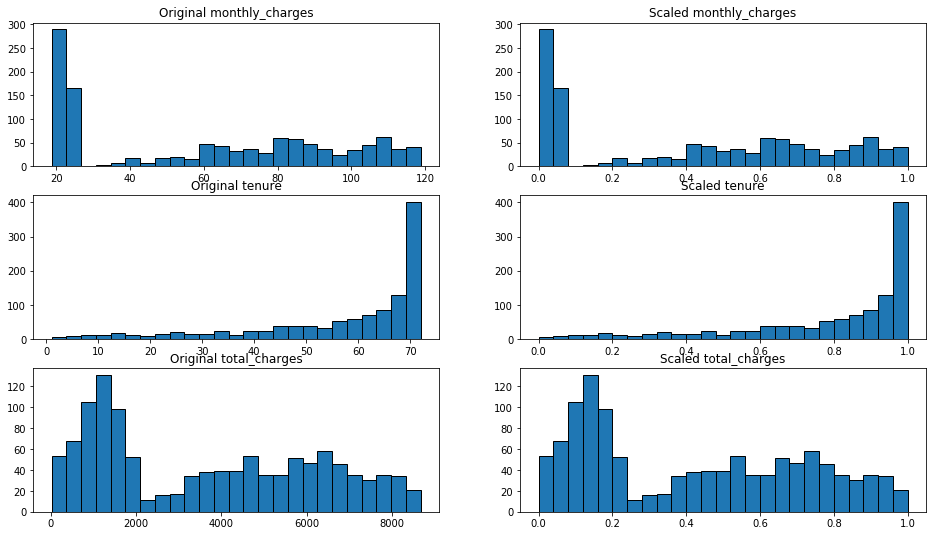

In [12]:
# Visualize the results of min-max scaling

plt.figure(figsize=(16, 9))
plt.subplot(321)
plt.hist(train_minmax.monthly_charges, bins=25, ec='black')
plt.title('Original monthly_charges')
plt.subplot(322)
plt.hist(train_minmax.monthly_charges_scaled, bins=25, ec='black')
plt.title('Scaled monthly_charges')

plt.subplot(323)
plt.hist(train_minmax.tenure, bins=25, ec='black')
plt.title('Original tenure')
plt.subplot(324)
plt.hist(train_minmax.tenure_scaled, bins=25, ec='black')
plt.title('Scaled tenure')
plt.subplot(325)

plt.hist(train_minmax.total_charges, bins=25, ec='black')
plt.title('Original total_charges')
plt.subplot(326)
plt.hist(train_minmax.total_charges_scaled, bins=25, ec='black')
plt.title('Scaled total_charges')

In [13]:
# Standard Scaler

columns_to_scale = ['monthly_charges', 'tenure', 'total_charges']

train_standard, validate_standard, test_standard = add_scaled_columns(train, validate, test,
                                                                      scaler_standard,
                                                                      columns_to_scale)

Text(0.5, 1.0, 'Scaled total_charges')

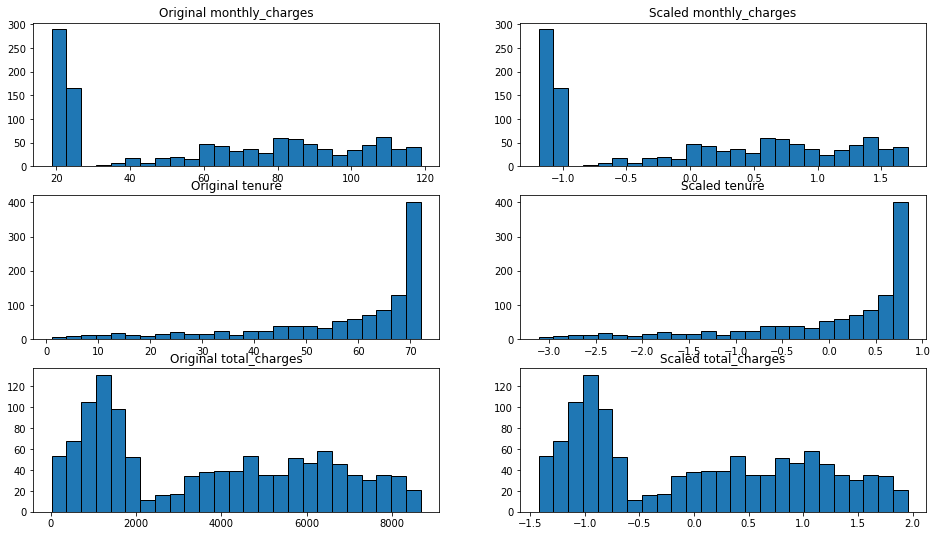

In [14]:
# Visualize the results of standard scaler

plt.figure(figsize=(16, 9))
plt.subplot(321)
plt.hist(train_standard.monthly_charges, bins=25, ec='black')
plt.title('Original monthly_charges')
plt.subplot(322)
plt.hist(train_standard.monthly_charges_scaled, bins=25, ec='black')
plt.title('Scaled monthly_charges')

plt.subplot(323)
plt.hist(train_standard.tenure, bins=25, ec='black')
plt.title('Original tenure')
plt.subplot(324)
plt.hist(train_standard.tenure_scaled, bins=25, ec='black')
plt.title('Scaled tenure')
plt.subplot(325)

plt.hist(train_standard.total_charges, bins=25, ec='black')
plt.title('Original total_charges')
plt.subplot(326)
plt.hist(train_standard.total_charges_scaled, bins=25, ec='black')
plt.title('Scaled total_charges')

In [15]:
# RobustScaler

columns_to_scale = ['monthly_charges', 'tenure', 'total_charges']

train_robust, validate_robust, test_robust = add_scaled_columns(train, validate, test,
                                                                scaler_robust,
                                                                columns_to_scale)

Text(0.5, 1.0, 'Scaled total_charges')

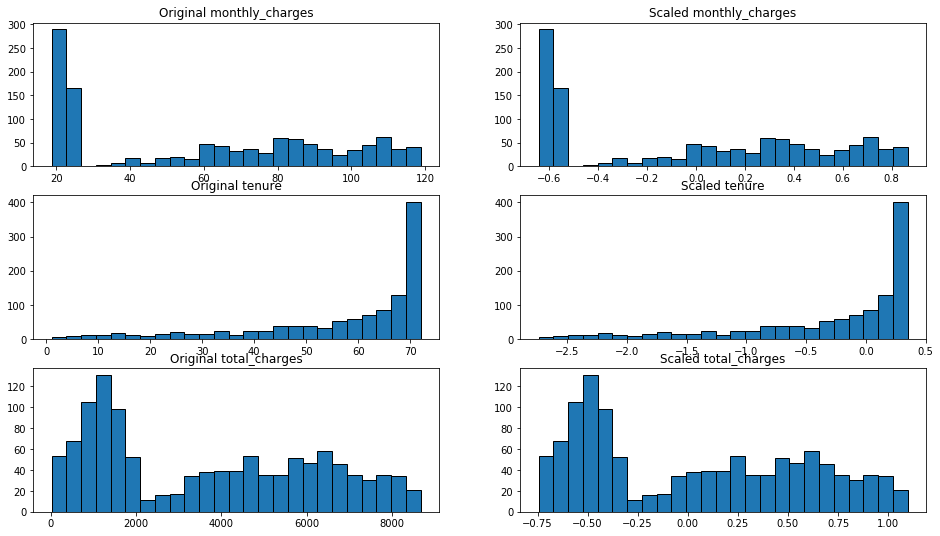

In [16]:
# Visualize the results of robust scaler

plt.figure(figsize=(16, 9))
plt.subplot(321)
plt.hist(train_robust.monthly_charges, bins=25, ec='black')
plt.title('Original monthly_charges')
plt.subplot(322)
plt.hist(train_robust.monthly_charges_scaled, bins=25, ec='black')
plt.title('Scaled monthly_charges')

plt.subplot(323)
plt.hist(train_robust.tenure, bins=25, ec='black')
plt.title('Original tenure')
plt.subplot(324)
plt.hist(train_robust.tenure_scaled, bins=25, ec='black')
plt.title('Scaled tenure')
plt.subplot(325)

plt.hist(train_robust.total_charges, bins=25, ec='black')
plt.title('Original total_charges')
plt.subplot(326)
plt.hist(train_robust.total_charges_scaled, bins=25, ec='black')
plt.title('Scaled total_charges')